<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import matplotlib.animation as animation

In [2]:
# hyper parameters
k = 10
size = 10000
seed = 42

In [3]:
dim = 2
torch.manual_seed(seed)
X = torch.randn(size, dim)
X.shape

torch.Size([10000, 2])

In [4]:
Labels = torch.zeros(size)
Labels.shape

torch.Size([10000])

In [5]:
E = X.mean().item()
E

0.009085875004529953

In [6]:
D = (E**2 - torch.mean(X**2)).item()
D

-1.003889799118042

In [7]:
random.seed(seed)
Centers = torch.stack([X[random.randint(0,size)] for _ in range(k)])
Colors = [i for i in range(k)]
Centers.shape

torch.Size([10, 2])

In [8]:
def euclide_fn(plan_matrix=X, centers=Centers, classes=k, dims=dim):
    tmp_tensor = torch.zeros(size,classes)
    #print(tmp_tensor.shape, plan_matrix.shape, centers.shape)
    for i in range(classes):
        tmp_tensor[:,i]=torch.sum((plan_matrix - centers[i].unsqueeze(dim=0))**2, dim=1)
    return tmp_tensor.argmin(dim=1)

In [9]:
def visualize(plan_matrix=X, labels=Labels, centers=Centers,classes=k, dims=dim, true_labels=Colors):
    plt.scatter(plan_matrix[:,0],plan_matrix[:,1], c=labels, cmap='brg')
    plt.scatter(centers[:,0],centers[:,1], s=300, c=true_labels, cmap='brg', alpha=0.9, marker='x')

In [10]:
def step(plan_matrix=X, centers=Centers, labels=Labels, classes=k, dims=dim, size=size, true_labels=Colors):
    new_centers = torch.zeros(classes,dims)
    #print(labels.shape, plan_matrix.shape, centers.shape)
    #print(torch.eq(labels,torch.full((1,size),true_labels[0]).squeeze()).shape)
    for i in range(classes):
        tmp = torch.eq(torch.vstack((Labels,Labels)).T,torch.full((size,dims),true_labels[i]))
        new_centers[i]= torch.sum(tmp * plan_matrix, dim=0) / sum(tmp)
    #print(new_centers)
    return new_centers

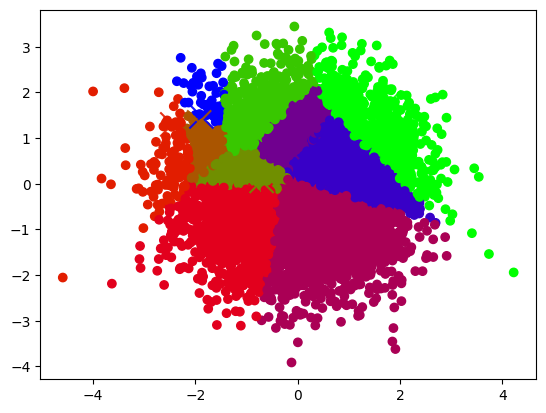

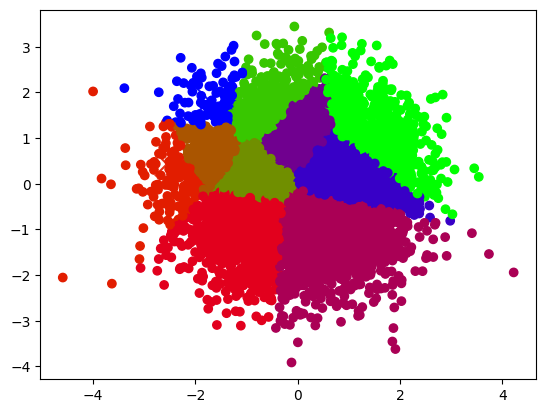

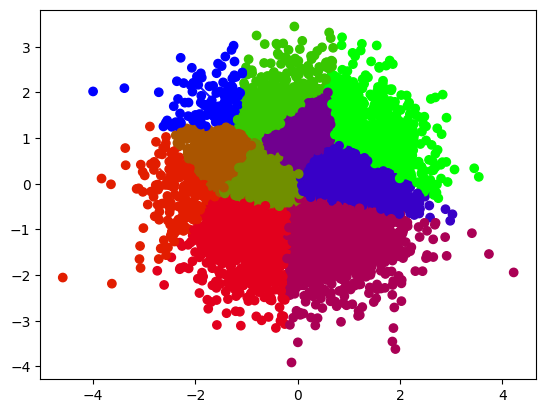

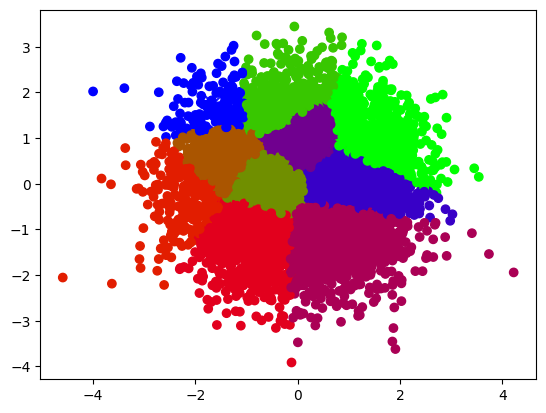

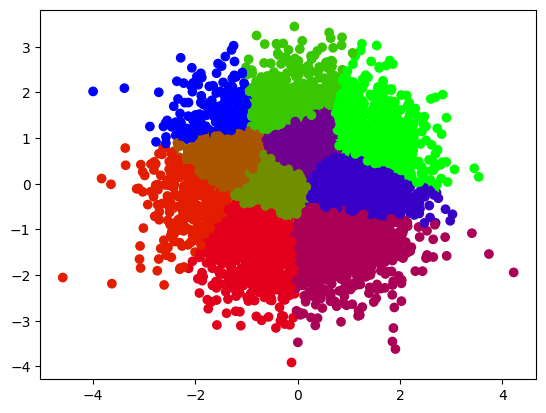

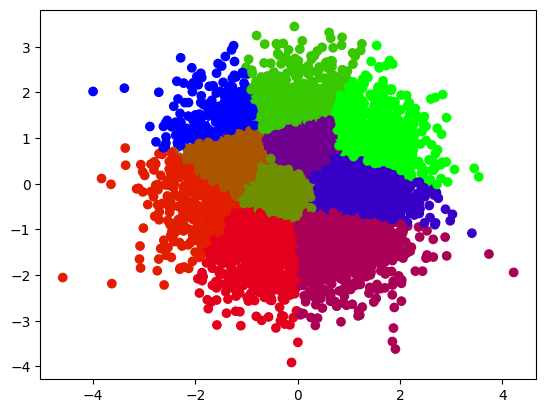

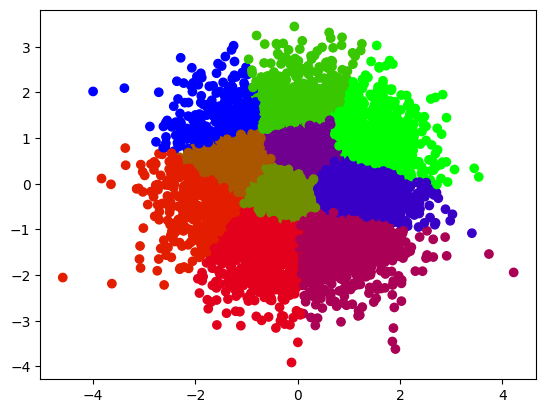

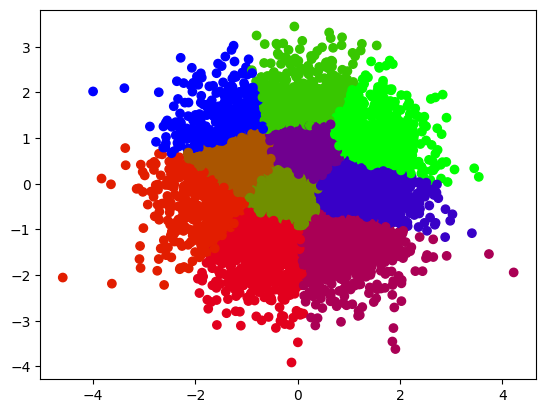

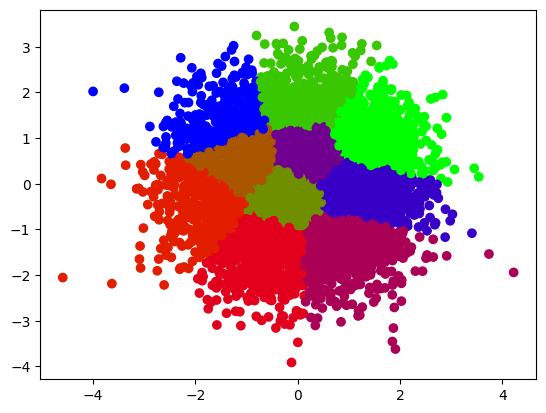

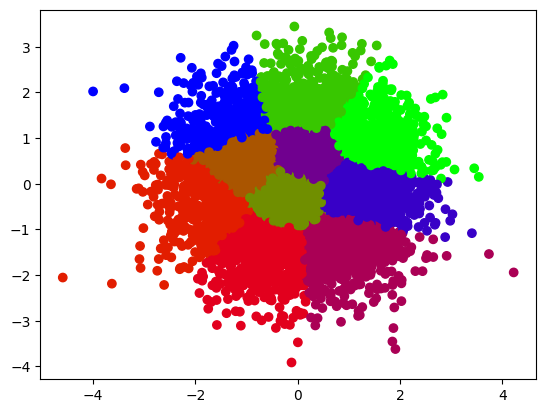

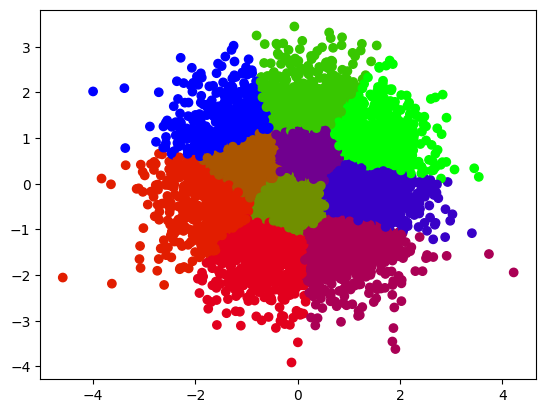

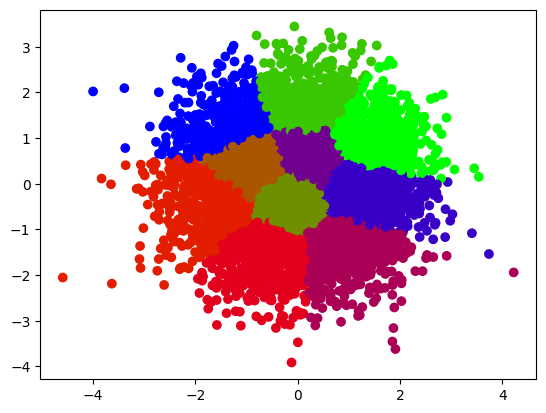

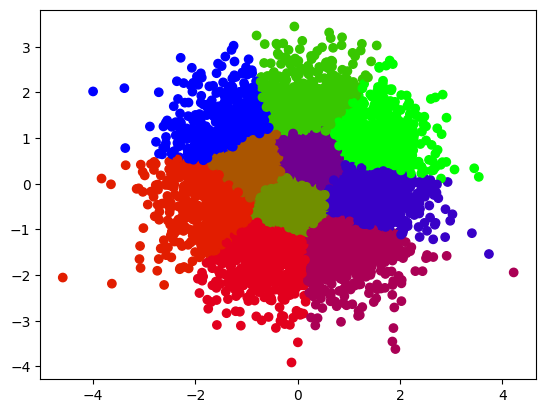

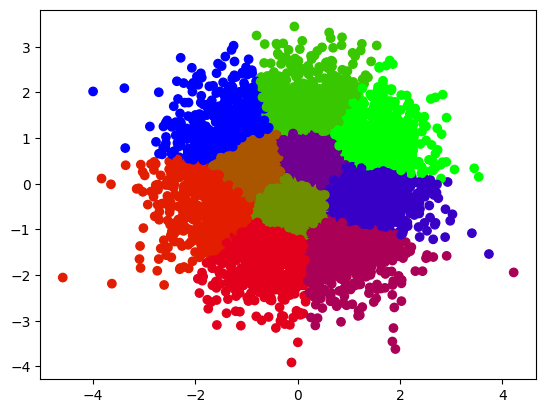

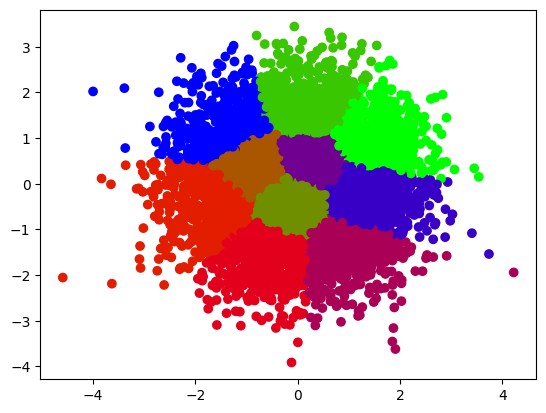

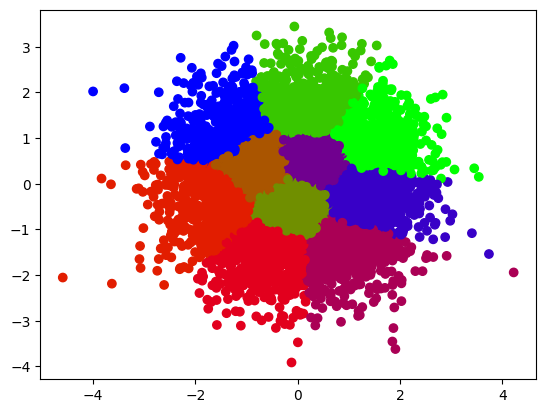

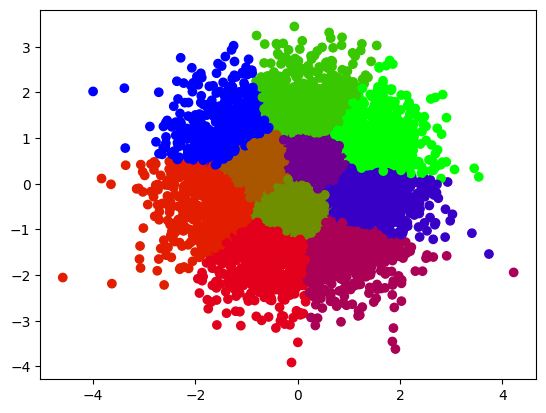

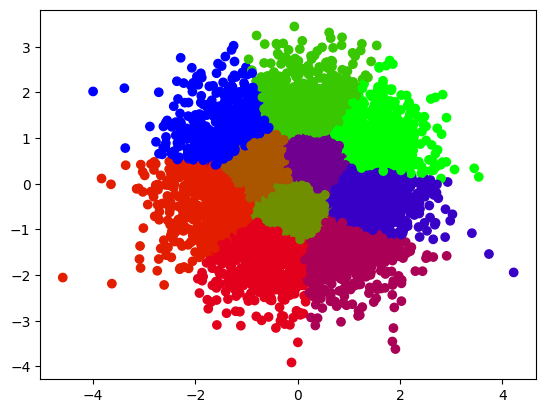

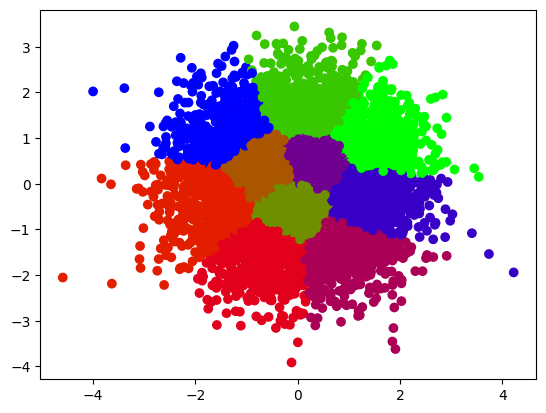

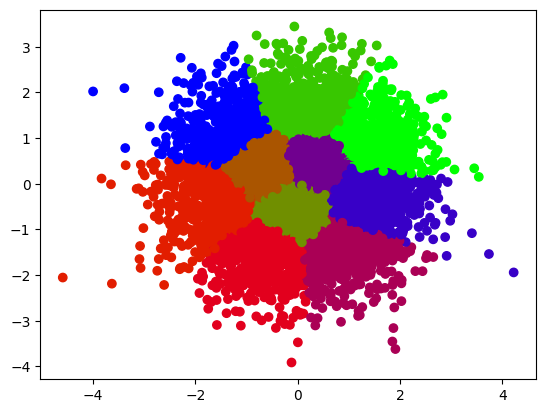

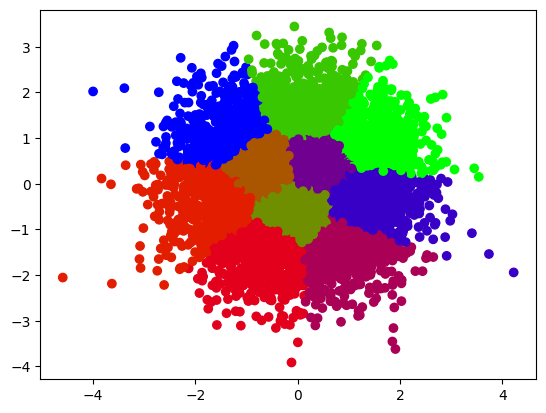

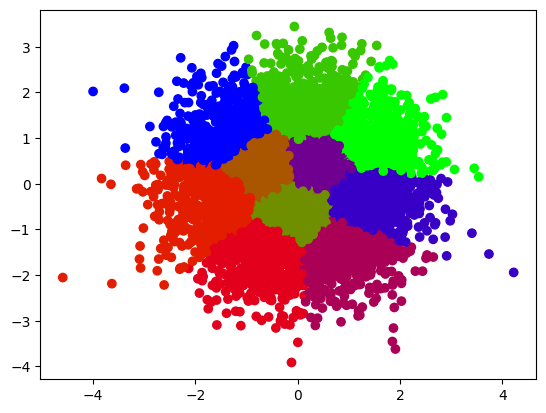

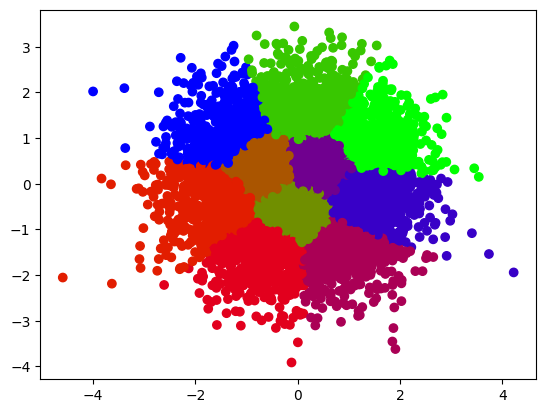

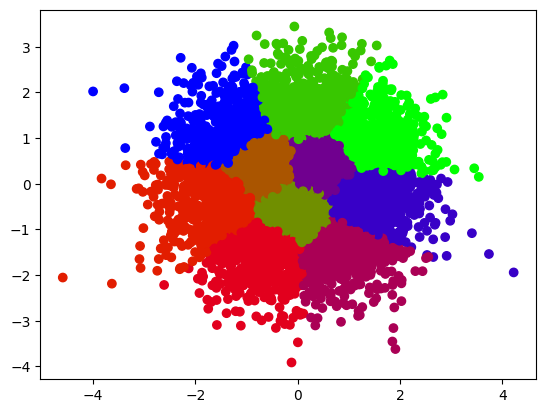

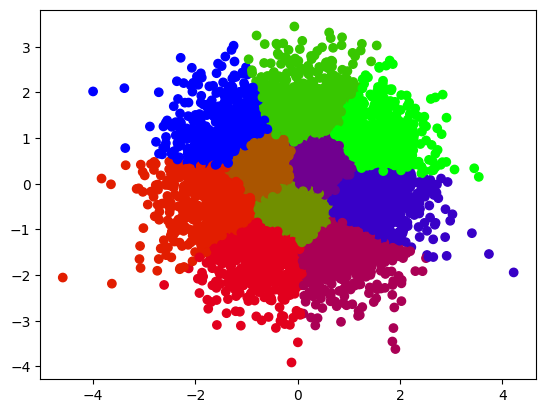

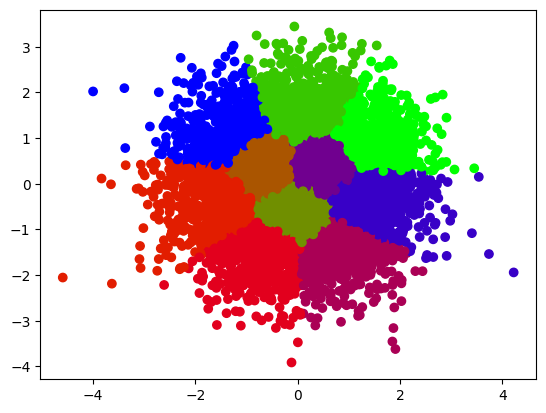

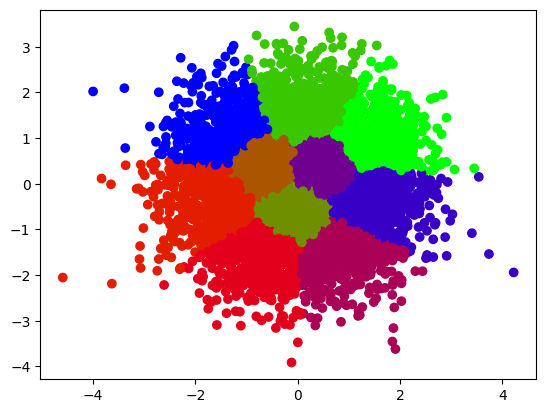

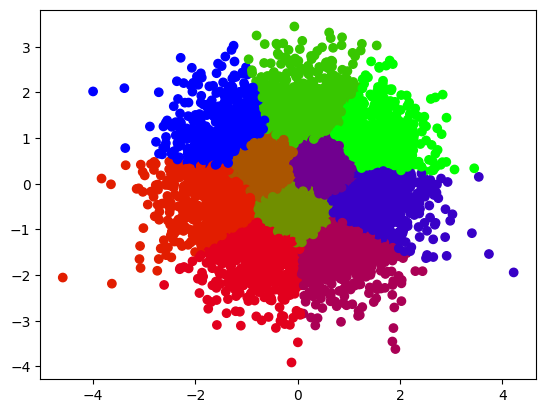

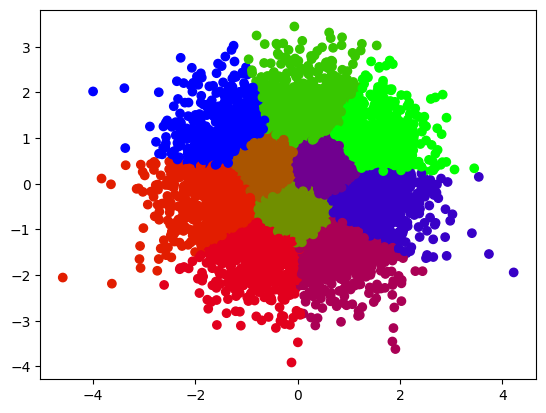

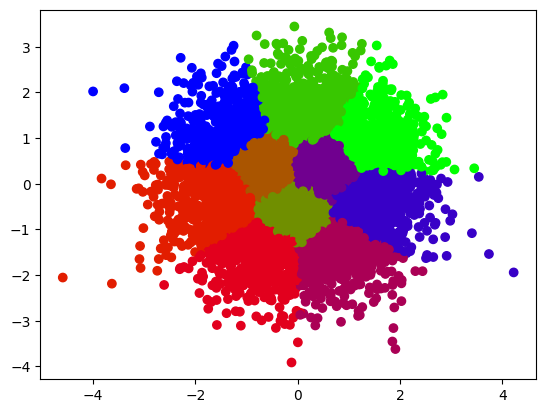

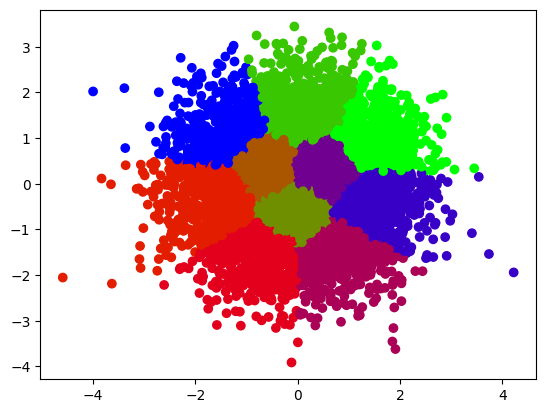

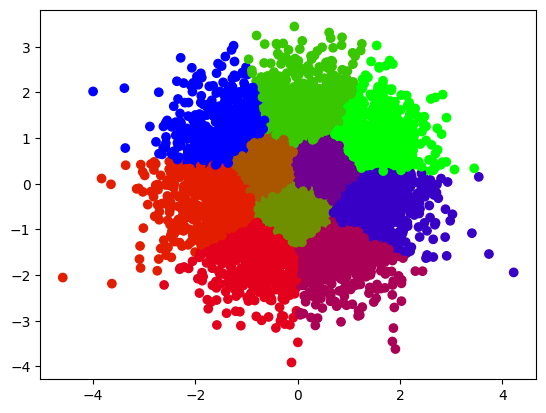

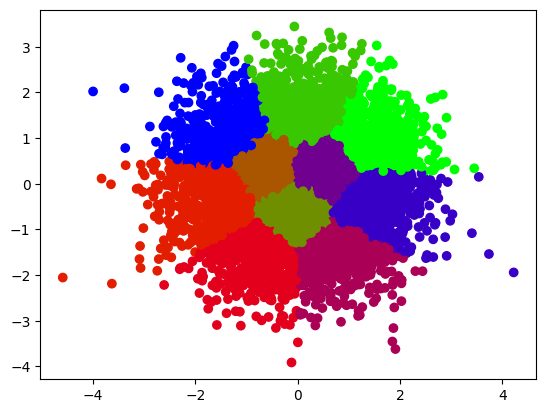

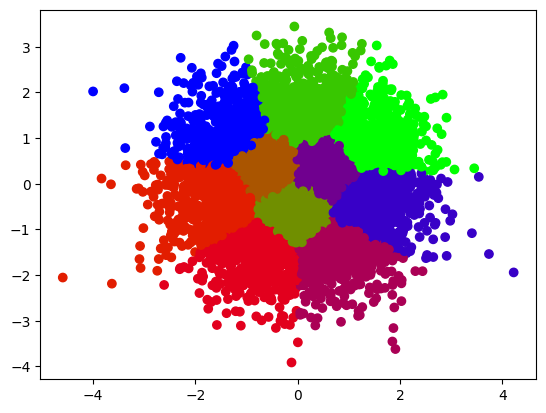

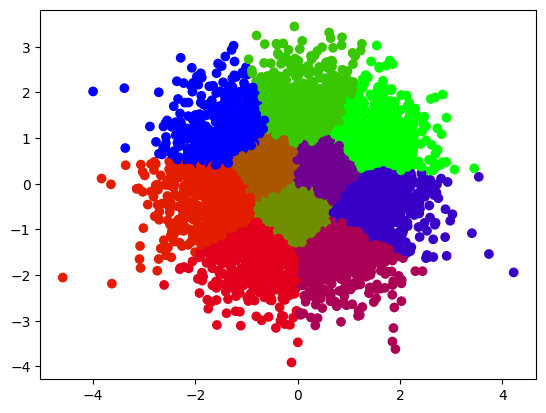

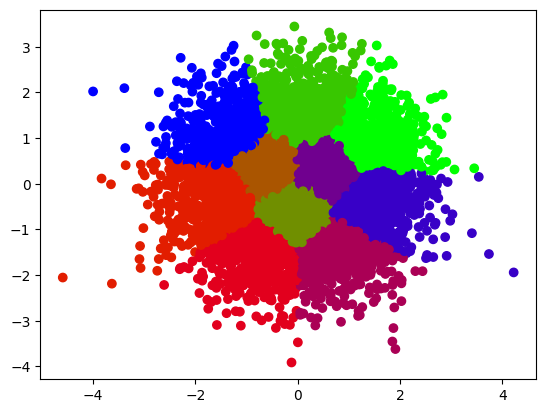

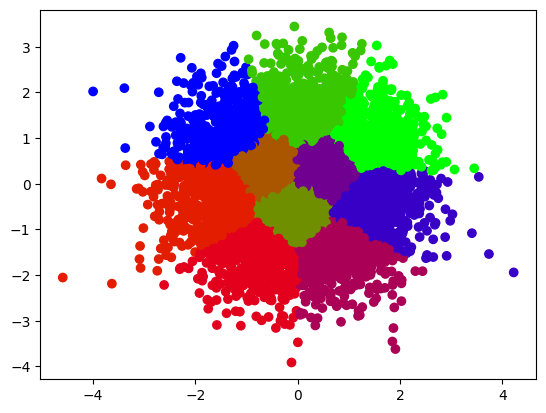

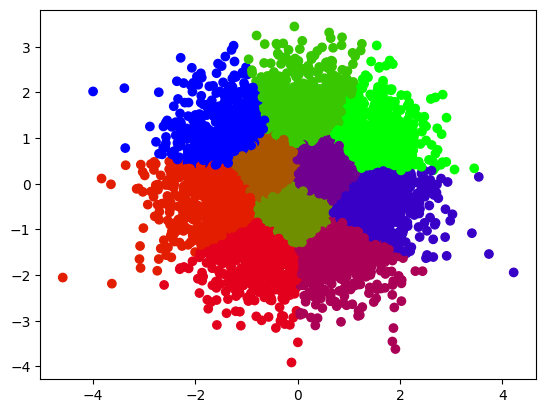

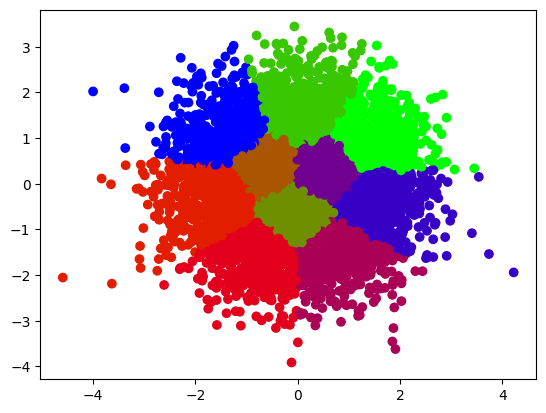

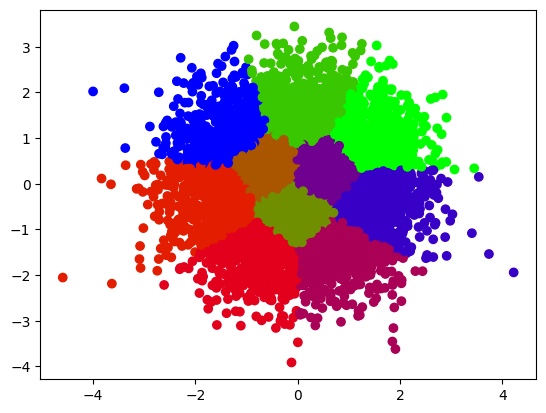

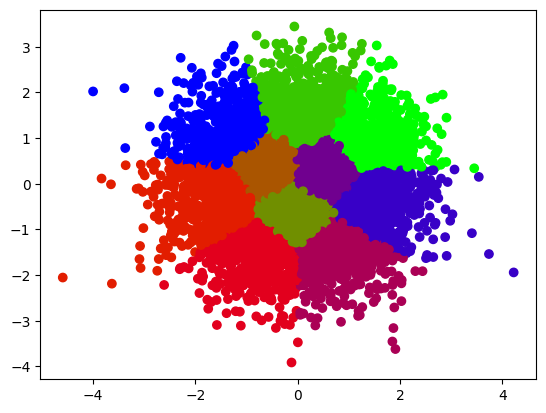

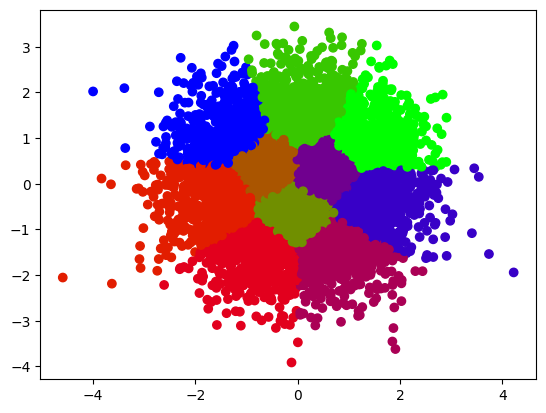

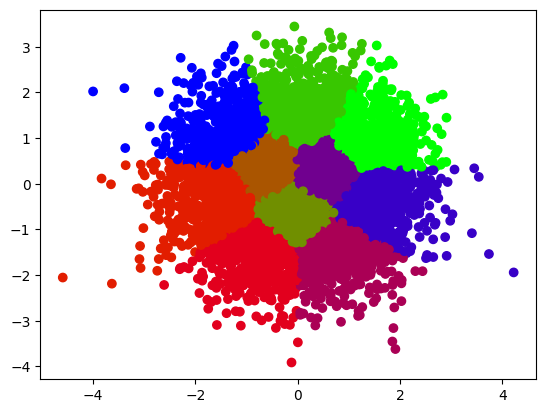

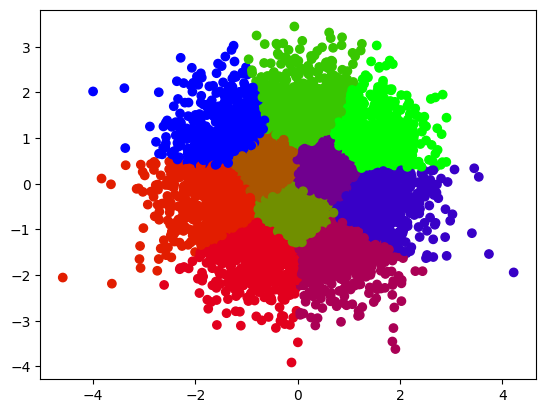

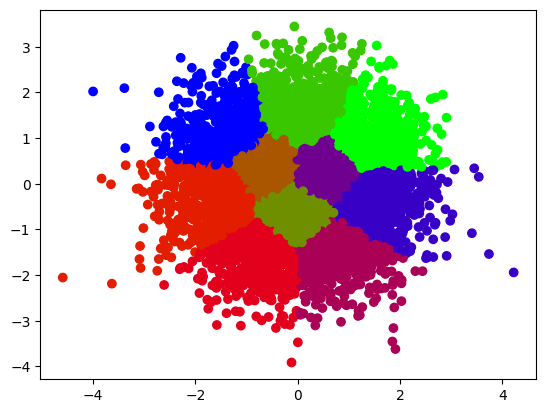

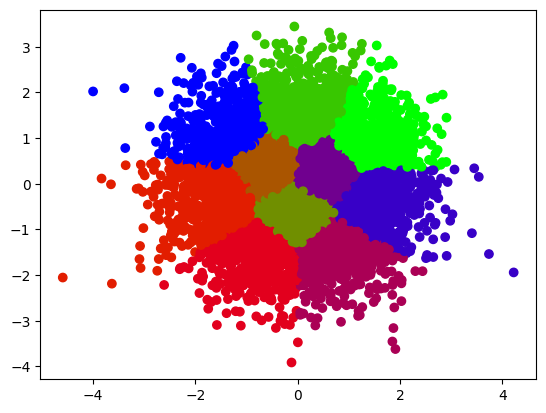

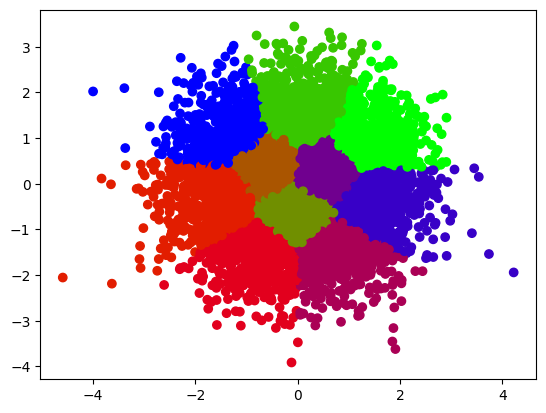

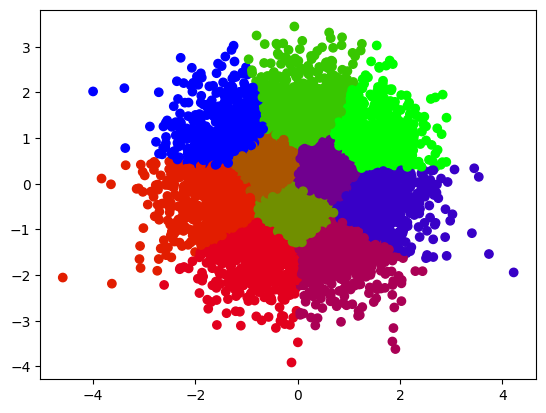

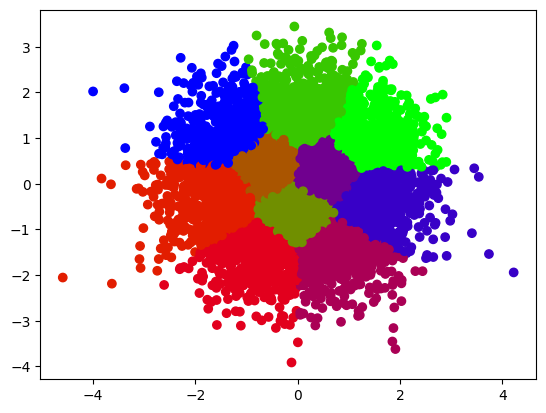

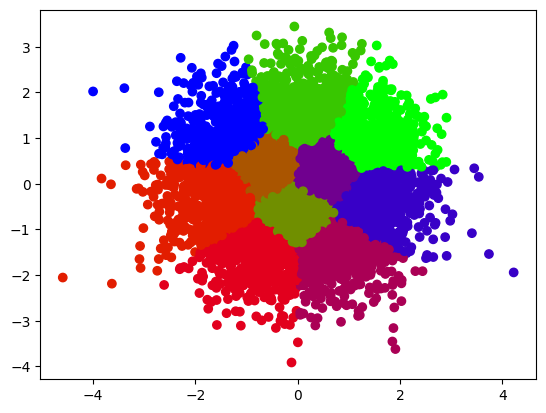

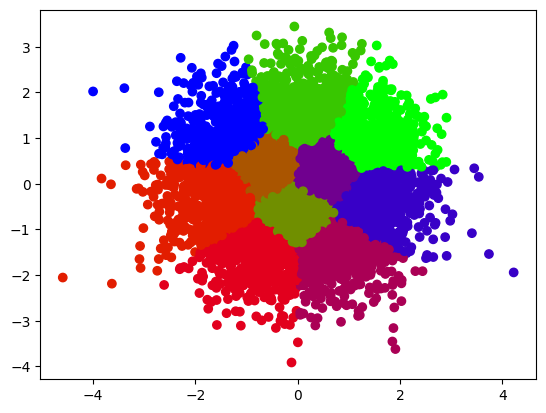

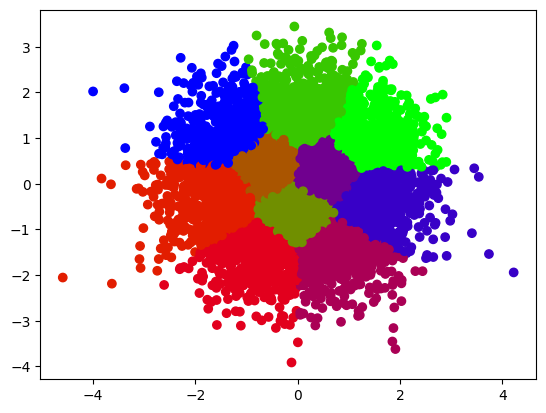

In [11]:
flag = True
#plt.ion()
while flag:
    Labels = euclide_fn(centers=Centers)
    #plt.clf()

    visualize(labels=Labels, centers=Centers)
    plt.show()
    #plt.draw()
    #plt.gcf().canvas.flush_events()
    new_centers = step(centers=Centers, labels=Labels)

    if torch.sum(torch.eq(new_centers,Centers)) == dim*k:
        flag = False
    else:
        Centers = new_centers
    time.sleep(0.2)
#plt.ioff()